<a href="https://colab.research.google.com/github/adcaceres69/Proyecto-DENGUE/blob/main/MODELOS%231/STORYTELLING_%2B_INSIGHT_%2B_MODELOS_CACERES_v260923.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ¿Se podría predecir la cantidad total de casos en una epidemia de Dengue?

El dengue es una enfermedad transmitida por mosquitos (Aedes aegypti) que se presenta en lugares con climas tropicales y subtropicales en el mundo.

La dinámica de transmisión de la enferemedad (dengue) está relacionada con variables climáticas como la temperatura y la precipitación.

En base a esto, se nos ha facilitado datos relacionados a dos ciudades, San Juan (Puerto Rico) e Iquitos (Peru), con datos de prueba para cada ciudad que abarcan 5 y 3 años respectivamente.

Los datos contenidos en el dataset son:
- Datos de ciudad y fechas (año; semanas)
- Indices de vegetación
- Precipitaciones totales
- Mediciones por reanálsis de pronósticos climáticos (precipitaciones; humedad el aire -relativa y específica-; temperaturas mínimas y máximas; rangos de temperaturas)
- Mediciones de estaciones meteorológicas

# Caracteristicas de los datos

Conjunto de información en una escala de tiempo (*year, weekofyear*):

Según corresponda, las unidades se proporcionan como un *_unit* como sufijo en el nombre del campo.

### Indicadores para ciudad y fecha
* *city*: Abreviaturas de ciudades: *sj* para San Juan y *sj* para Iquitos
* *week_start_date*: Fecha dada en formato aaaa-mm-dd

###Mediciones diarias de la estación meteorológica de datos climáticos GHCN de la NOAA:
* *station_max_temp_c*: Temperatura máxima
* *station_min_temp_c*: Temperatura mínima
* *station_avg_temp_c*: Temperatura media
* *station_precip_mm*: Precipitación total
* *station_diur_temp_rng_c*: Rango de temperatura diurna

###Mediciones de precipitación por satélite PERSIANN (escala de 0,25 x 0,25 grados):
* *precipitation_amt_mm*: Precipitación total

###Mediciones de reanálisis del sistema de pronóstico climático NCEP de la NOAA (escala de 0,5 x 0,5 grados):
* *reanalysis_sat_precip_amt_mm*: Precipitación total
* *reanalysis_dew_point_temp_k*: Temperatura media del punto de rocío
* *reanalysis_air_temp_k*: Temperatura media del aire
* *reanalysis_relative_humidity_percent*: Humedad relativa media
* *reanalysis_specific_humidity_g_per_kg*: Humedad específica media
* *reanalysis_precip_amt_kg_per_m2*: Precipitación total
* *reanalysis_max_air_temp_k*: Temperatura máxima del aire
* *reanalysis_min_air_temp_k*: Temperatura mínima del aire
* *reanalysis_avg_temp_k*: Temperatura media del aire
* *reanalysis_tdtr_k*: Rango de temperatura diurna

###Vegetación satelital - Índice de vegetación de diferencia normalizada (NDVI) - Mediciones del índice de vegetación de diferencia normalizada CDR de NOAA (escala de 0,5x0,5 grados):
* *ndvi_se*: Píxel al sureste del centroide de la ciudad
* *ndvi_sw*: Pixel al suroeste del centroide de la ciudad
* *ndvi_ne*: Píxel al noreste del centroide de la ciudad
* *ndvi_nw*: Pixel al sureste del centroide de la ciudad

## el dataset esta relacionado con mediciones climáticas y el total de casos de dengue (columna "total_cases"). *Esta es nuestra variable objetivo*

In [ ]:
# cargado herramientas

# librerías genéricas par tratar datos
import pandas as pd
import numpy as np

import scipy

# librerías gráficas
import matplotlib.pyplot as plt
import seaborn as sns

#importando clase PCA desde scikit-learn
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, RobustScaler, StandardScaler

# herramientas varias
from sklearn.impute import SimpleImputer
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.linear_model import LogisticRegression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.stats import norm
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, RobustScaler, StandardScaler
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsRegressor
from scipy import stats
from scipy.stats import shapiro

from sklearn.model_selection import train_test_split

#
from warnings import filterwarnings
filterwarnings('ignore')


In [ ]:
#leyendo datos
df_features = pd.read_csv('/dengue_features_train.csv', index_col=[0,1,2]) #dataset con características climáticas
df_label = pd.read_csv('/dengue_labels_train.csv', index_col=[0,1,2]) #dataset con casos de casos y otros por ciudad

In [ ]:
df_label

total_cases
city year weekofyear             
sj   1990 18                    4
          19                    5
          20                    4
          21                    3
          22                    6
...                           ...
iq   2010 21                    5
          22                    8
          23                    1
          24                    1
          25                    4

[1456 rows x 1 columns]

## EDA

In [ ]:
df_features.sample(5)

week_start_date   ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
city year weekofyear                                                           
iq   2000 33              2000-08-19  0.384133  0.392240  0.341780  0.382750   
sj   1999 27              1999-07-09  0.097467  0.086167  0.183857  0.178886   
     1998 3               1998-01-15 -0.016150 -0.008225  0.204714  0.198571   
     2002 5               2002-01-29       NaN       NaN       NaN       NaN   
     2004 29              2004-07-15 -0.052900 -0.101000  0.185314  0.149843   

                      precipitation_amt_mm  reanalysis_air_temp_k  \
city year weekofyear                                                
iq   2000 33                         42.08             297.627143   
sj   1999 27                         73.30             299.504286   
     1998 3                         106.97             297.612857   
     2002 5                           0.00             298.200000   
     2004 29                         59.15             300.575714   

                      reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  \
city year weekofyear                                                       
iq   2000 33                     299.335714                   293.992857   
sj   1999 27                     299.535714                   295.920000   
     1998 3                      297.685714                   294.852857   
     2002 5                      298.350000                   293.847143   
     2004 29                     300.671429                   296.797143   

                      reanalysis_max_air_temp_k  ...  \
city year weekofyear                             ...   
iq   2000 33                              307.9  ...   
sj   1999 27                              301.4  ...   
     1998 3                               300.2  ...   
     2002 5                               300.1  ...   
     2004 29                              302.4  ...   

                      reanalysis_precip_amt_kg_per_m2  \
city year weekofyear                                    
iq   2000 33                                     16.9   
sj   1999 27                                     55.1   
     1998 3                                      53.2   
     2002 5                                      10.8   
     2004 29                                     15.8   

                      reanalysis_relative_humidity_percent  \
city year weekofyear                                         
iq   2000 33                                     82.490000   
sj   1999 27                                     80.798571   
     1998 3                                      84.694286   
     2002 5                                      76.920000   
     2004 29                                     79.995714   

                      reanalysis_sat_precip_amt_mm  \
city year weekofyear                                 
iq   2000 33                                 42.08   
sj   1999 27                                 73.30   
     1998 3                                 106.97   
     2002 5                                   0.00   
     2004 29                                 59.15   

                      reanalysis_specific_humidity_g_per_kg  \
city year weekofyear                                          
iq   2000 33                                      15.465714   
sj   1999 27                                      17.295714   
     1998 3                                       16.208571   
     2002 5                                       15.187143   
     2004 29                                      18.252857   

                      reanalysis_tdtr_k  station_avg_temp_c  \
city year weekofyear                                          
iq   2000 33                  13.700000           26.583333   
sj   1999 27                   2.357143           27.400000   
     1998 3                    1.885714           24.885714   
     2002 5                    2.185714           25.657143   
     2004 29    

In [ ]:
df_label.sample(5)


total_cases
city year weekofyear             
sj   1998 9                    41
     2004 51                   15
     2006 33                   16
     1999 49                   25
iq   2004 35                    6

In [ ]:
# Cantidad de filas y columnas en los dataset
print('El dataset "df_features" tiene ' + str(df_features.shape[0]) + ' filas, y ' + str(df_features.shape[1]) + ' columnas.')
print('El dataset "df_label" tiene ' + str(df_label.shape[0]) + ' filas, y ' + str(df_label.shape[1]) + ' columnas.')

El dataset "df_features" tiene 1456 filas, y 21 columnas.
El dataset "df_label" tiene 1456 filas, y 1 columnas.


In [ ]:
#Separando datos de las ciudades
# para San Juan, Puerto Rico
sj_train_features = df_features.loc['sj']
sj_train_labels = df_label.loc['sj']

# para Iquitos, Venezuela
iq_train_features = df_features.loc['iq']
iq_train_labels = df_label.loc['iq']

In [ ]:
print('San Juan')
print('Caracteristicas: ', sj_train_features.shape)
print('Etiquetas  : ', sj_train_labels.shape)

print('\nIquitos')
print('Caracteristicas: ', iq_train_features.shape)
print('Etiquetas  : ', iq_train_labels.shape)

San Juan
Caracteristicas:  (936, 21)
Etiquetas  :  (936, 1)

Iquitos
Caracteristicas:  (520, 21)
Etiquetas  :  (520, 1)


In [ ]:
sj_train_features.head()

week_start_date   ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
year weekofyear                                                           
1990 18              1990-04-30  0.122600  0.103725  0.198483  0.177617   
     19              1990-05-07  0.169900  0.142175  0.162357  0.155486   
     20              1990-05-14  0.032250  0.172967  0.157200  0.170843   
     21              1990-05-21  0.128633  0.245067  0.227557  0.235886   
     22              1990-05-28  0.196200  0.262200  0.251200  0.247340   

                 precipitation_amt_mm  reanalysis_air_temp_k  \
year weekofyear                                                
1990 18                         12.42             297.572857   
     19                         22.82             298.211429   
     20                         34.54             298.781429   
     21                         15.36             298.987143   
     22                          7.52             299.518571   

                 reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  \
year weekofyear                                                       
1990 18                     297.742857                   292.414286   
     19                     298.442857                   293.951429   
     20                     298.878571                   295.434286   
     21                     299.228571                   295.310000   
     22                     299.664286                   295.821429   

                 reanalysis_max_air_temp_k  ...  \
year weekofyear                             ...   
1990 18                              299.8  ...   
     19                              300.9  ...   
     20                              300.5  ...   
     21                              301.4  ...   
     22                              301.9  ...   

                 reanalysis_precip_amt_kg_per_m2  \
year weekofyear                                    
1990 18                                    32.00   
     19                                    17.94   
     20                                    26.10   
     21                                    13.90   
     22                                    12.20   

                 reanalysis_relative_humidity_percent  \
year weekofyear                                         
1990 18                                     73.365714   
     19                                     77.368571   
     20                                     82.052857   
     21                                     80.337143   
     22                                     80.460000   

                 reanalysis_sat_precip_amt_mm  \
year weekofyear                                 
1990 18                                 12.42   
     19                                 22.82   
     20                                 34.54   
     21                                 15.36   
     22                                  7.52   

                 reanalysis_specific_humidity_g_per_kg  reanalysis_tdtr_k  \
year weekofyear                                                             
1990 18                                      14.012857           2.628571   
     19                                      15.372857           2.371429   
     20                                      16.848571           2.300000   
     21                                      16.672857           2.428571   
     22                                      17.210000           3.014286   

                 station_avg_temp_c  station_diur_temp_rng_c  \
year weekofyear                                                
1990 18                   25.442857                 6.900000   
     19                   26.714286                 6.371429   
     20                   26.714286                 6.485714   
     21                   27.471429                 6.771429   
     22                   28.942857                 9.371429   

                 station_max_temp_c  station_min_temp_c  station_precip_mm  
year weeko

*existen muchas variables climaticas; ademas exite esta variable "week_start_date" queno sera ncesaria por ahora*

In [ ]:
# borramos `week_start_date`.
sj_train_features.drop('week_start_date', axis=1, inplace=True)
iq_train_features.drop('week_start_date', axis=1, inplace=True)

In [ ]:
sj_train_features.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 936 entries, (1990, 18) to (2008, 17)
Data columns (total 20 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   ndvi_ne                                745 non-null    float64
 1   ndvi_nw                                887 non-null    float64
 2   ndvi_se                                917 non-null    float64
 3   ndvi_sw                                917 non-null    float64
 4   precipitation_amt_mm                   927 non-null    float64
 5   reanalysis_air_temp_k                  930 non-null    float64
 6   reanalysis_avg_temp_k                  930 non-null    float64
 7   reanalysis_dew_point_temp_k            930 non-null    float64
 8   reanalysis_max_air_temp_k              930 non-null    float64
 9   reanalysis_min_air_temp_k              930 non-null    float64
 10  reanalysis_precip_amt_kg_per_m2        930 non-null    flo

In [ ]:
#comprobando valores nulos
sj_train_features.isnull().sum()

ndvi_ne                                  191
ndvi_nw                                   49
ndvi_se                                   19
ndvi_sw                                   19
precipitation_amt_mm                       9
reanalysis_air_temp_k                      6
reanalysis_avg_temp_k                      6
reanalysis_dew_point_temp_k                6
reanalysis_max_air_temp_k                  6
reanalysis_min_air_temp_k                  6
reanalysis_precip_amt_kg_per_m2            6
reanalysis_relative_humidity_percent       6
reanalysis_sat_precip_amt_mm               9
reanalysis_specific_humidity_g_per_kg      6
reanalysis_tdtr_k                          6
station_avg_temp_c                         6
station_diur_temp_rng_c                    6
station_max_temp_c                         6
station_min_temp_c                         6
station_precip_mm                          6
dtype: int64

Text(0.5, 0, 'Time')

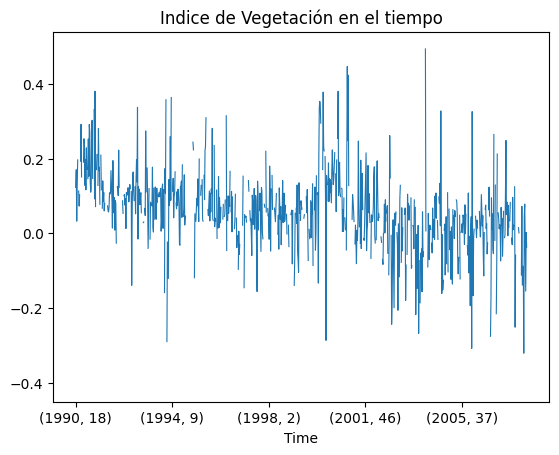

In [ ]:
(sj_train_features
     .ndvi_ne
     .plot
     .line(lw=0.8))

plt.title('Indice de Vegetación en el tiempo')
plt.xlabel('Time')

*al ser una serie de tiempo se observan los cortes en las lineas donde hay datos nulos*

In [ ]:
#aplicamos una forma simple para completar esos datos - Valores mas recientes
sj_train_features.fillna(method='ffill', inplace=True)
iq_train_features.fillna(method='ffill', inplace=True)

* Nuestra variable objetivo "total_cases" es un número entero no negativo, lo que significa que estamos buscando hacer algunas predicciones de conteo; usaremos técnicas de regresión estándar para este tipo de predicción

In [ ]:
# veamos la distribución de la etiquetas = df_label
print('San Juan')
print('Promedio: ', sj_train_labels.mean())
print('varianza :', sj_train_labels.var())

print('\nIquitos')
print('promedio: ', iq_train_labels.mean())
print('varianza :', iq_train_labels.var())

San Juan
Promedio:  total_cases    34.180556
dtype: float64
varianza : total_cases    2640.04544
dtype: float64

Iquitos
promedio:  total_cases    7.565385
dtype: float64
varianza : total_cases    115.895524
dtype: float64


Text(0.5, 1.0, 'Distribución de casos en San Juan')

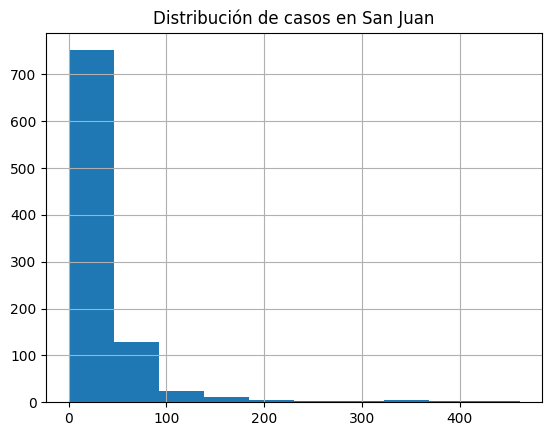

In [ ]:
# distribución de casos para San Juan
sj_train_labels.hist()
plt.title('Distribución de casos en San Juan')

Text(0.5, 1.0, 'Distribución de casos en Iquitos')

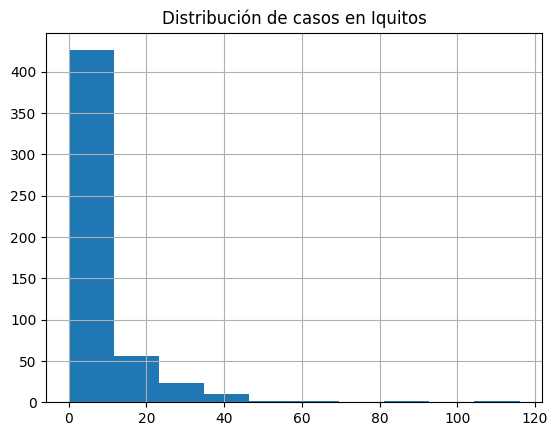

In [ ]:
# distribución de casos para Iquitos
iq_train_labels.hist()
plt.title('Distribución de casos en Iquitos')

El promedio de la Varianza de "total_cases" tiene una distribución negativa

## Pasemos a identificar las correlaciones de nuestra variable objetivo con las variables climáticas. Para ello incluiremos a la variable total_cases a nuestros datos

In [ ]:
sj_train_features['total_cases'] = sj_train_labels.total_cases
iq_train_features['total_cases'] = iq_train_labels.total_cases

In [ ]:
#Calculamos matrices de correlación
# compute the correlations
sj_correlations = sj_train_features.corr()
iq_correlations = iq_train_features.corr()

Text(0.5, 1.0, 'Variables de Correlación para San Juan')

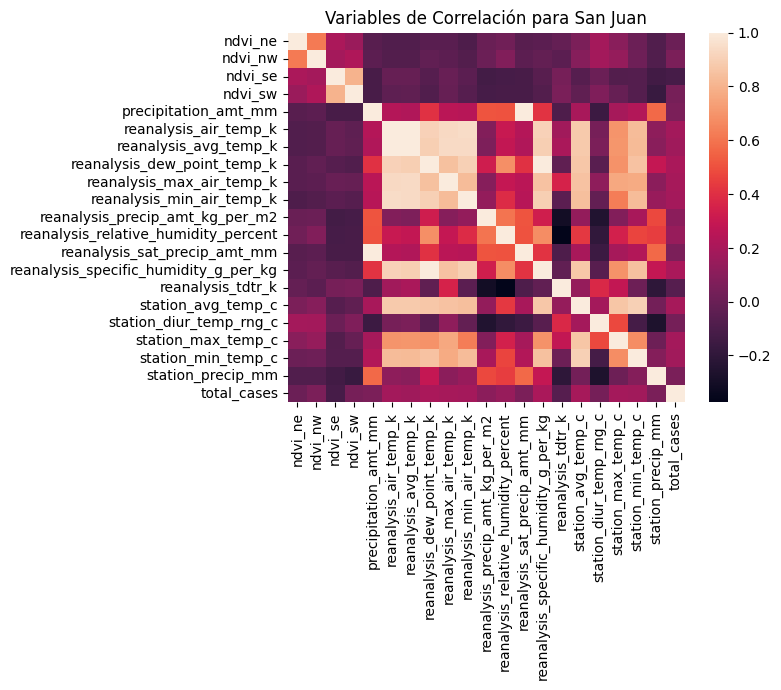

In [ ]:
#graficando para San Juan
sj_corr_heat = sns.heatmap(sj_correlations)
plt.title('Variables de Correlación para San Juan')

Text(0.5, 1.0, 'Variables de Correlación para Iquitos')

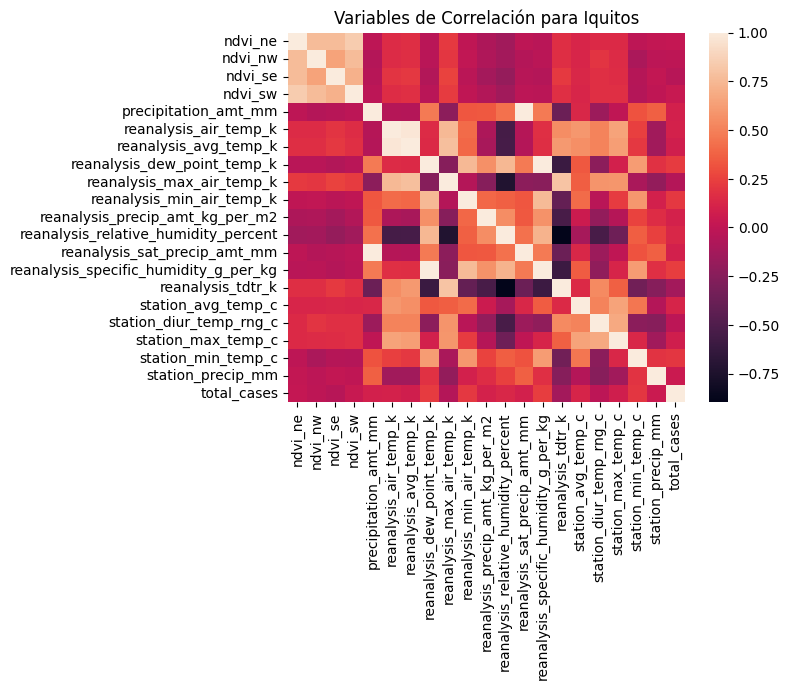

In [ ]:
# graficando para Iquitos
iq_corr_heat = sns.heatmap(iq_correlations)
plt.title('Variables de Correlación para Iquitos')

Se observan como los datso de temperaturas estan correlacionados entre si. Pero no hay correlaciones fuertes con "total_cases"

## Ordenamos las correlaciones y vemos que pasa

<Axes: >

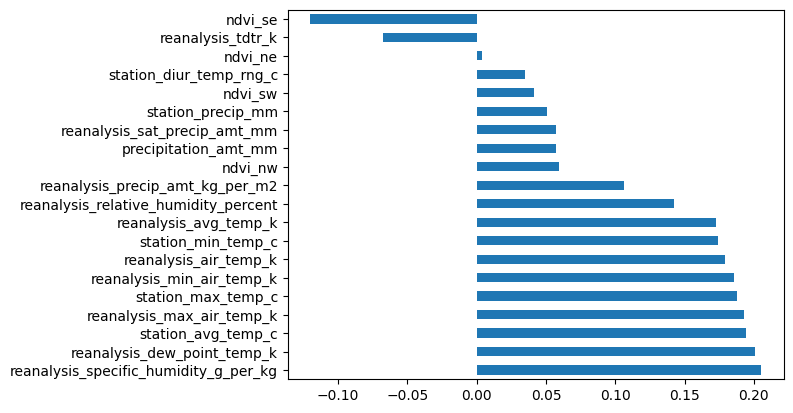

In [ ]:
# correlaciones ordenadas para San Juan
(sj_correlations
     .total_cases
     .drop('total_cases') # no se compara consigo
     .sort_values(ascending=False)
     .plot
     .barh())

<Axes: >

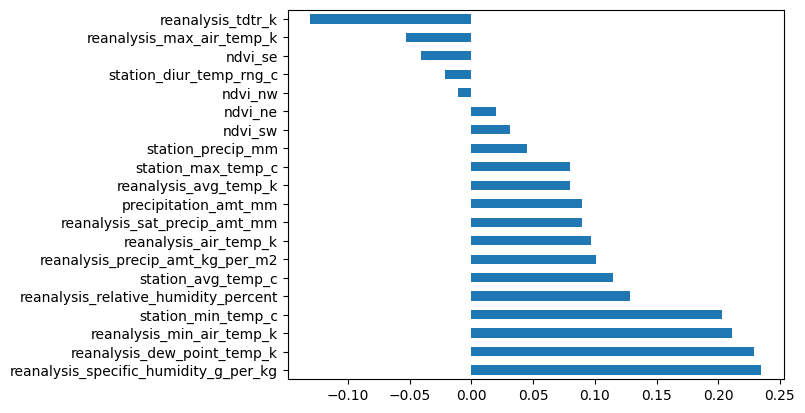

In [ ]:
# Correlaciones ordenadas para Iquitos
(iq_correlations
     .total_cases
     .drop('total_cases') # no se compara consigo
     .sort_values(ascending=False)
     .plot
     .barh())

In [ ]:
iq_correlations.columns

Index(['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm',
       'reanalysis_air_temp_k', 'reanalysis_avg_temp_k',
       'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k',
       'reanalysis_min_air_temp_k', 'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases'],
      dtype='object')

Se observa que:
*   las variables "reanalysis_dew_point_temp_k" (Temperatura media del punto de rocío) y "reanalysis_specific_humidity_g_per_kg" (Humedad específica media) estan correlacionadas fuertemente con "total_cases". Eso se comprueba porque a mas humedad mas prospero el mosquito
*   a medida que las temperaturas aumentan, tambien lo hacen los casos de enfermedad
*   las precipitaciones no inciden mayormente en el aumeto de casos



**HASTA AQUI LO DE STORYTELLING**

## MODELANDO
*   Tomaremos las 3 variables mencionadas arriba; de humedad y temperatura y agregaremos una mas, para comenzar a modelar
*   Crearemos una funcion de preprocesamiento para resumir



In [ ]:
# preprocess_data = prepro_data
def prepro_data(data_path, labels_path=None):
    # cargar datos y establecer índice en ciudad, año, semana del año
    df = pd.read_csv(data_path, index_col=[0, 1, 2])

    # seleccionar las variables que queremos
    features = ['reanalysis_specific_humidity_g_per_kg',
                 'reanalysis_dew_point_temp_k',
                 'station_avg_temp_c',
                 'station_min_temp_c']
    df = df[features]

    # llenar los valores faltantes
    df.fillna(method='ffill', inplace=True)
    #otro metodo a probar ---> df.fillna(df.mean(), inplace=True)

    # agregar "labels" al marco de los datos
    if labels_path:
        labels = pd.read_csv(labels_path, index_col=[0, 1, 2])
        df = df.join(labels)

    # separar las ciudades de san juan e iquitos
    sj = df.loc['sj']
    iq = df.loc['iq']

    return sj, iq

In [ ]:
sj_train, iq_train = prepro_data('/dengue_features_train.csv',
                                    labels_path='/dengue_labels_train.csv')

In [ ]:
# estadisticos de sj
sj_train.describe()

,reanalysis_specific_humidity_g_per_kg,reanalysis_dew_point_temp_k,station_avg_temp_c,station_min_temp_c,total_cases
count,936.000000,936.000000,936.000000,936.000000,936.000000
mean,16.547535,295.104736,26.999191,22.594017,34.180556
std,1.560663,1.570075,1.415079,1.506281,51.381372
min,11.715714,289.642857,22.842857,17.800000,0.000000
25%,15.233571,293.843929,25.842857,21.700000,9.000000
50%,16.835000,295.451429,27.214286,22.800000,19.000000
75%,17.854286,296.415714,28.175000,23.900000,37.000000
max,19.440000,297.795714,30.071429,25.600000,461.000000


In [ ]:
# estadisticos de iq
iq_train.describe()

,reanalysis_specific_humidity_g_per_kg,reanalysis_dew_point_temp_k,station_avg_temp_c,station_min_temp_c,total_cases
count,520.000000,520.000000,520.000000,520.000000,520.000000
mean,17.102019,295.498723,27.506331,21.210385,7.565385
std,1.443048,1.414360,0.908973,1.257734,10.765478
min,12.111429,290.088571,21.400000,14.700000,0.000000
25%,16.121429,294.596429,26.957500,20.600000,1.000000
50%,17.428571,295.852143,27.587500,21.400000,5.000000
75%,18.180357,296.557143,28.075000,22.000000,9.000000
max,20.461429,298.450000,30.800000,24.200000,116.000000


### continuar y al final volver a este punto. (de ACA debo saltar al texto "APARTADO ESPECIAL" ----)

* división del conjunto de datos

In [ ]:
# para sj_train
X = sj_train.drop(columns=['total_cases'])  # características
y = sj_train['total_cases']  # variable objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

* contrucción del modelo regresion lineal

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# error medio cuadrado
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Error medio cuadrado SJ: {mse:.2f}")

Error medio cuadrado SJ: 2790.52


In [ ]:
# coeficiente de determinación
r2 = r2_score(y_test, y_pred)
print(f'R2 score SJ: {r2}')

R2 score SJ: 0.04051591856398107


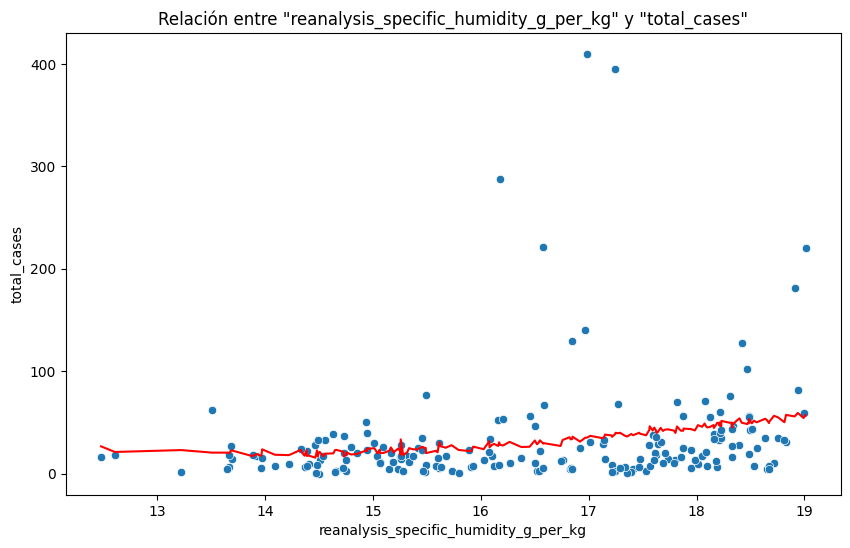

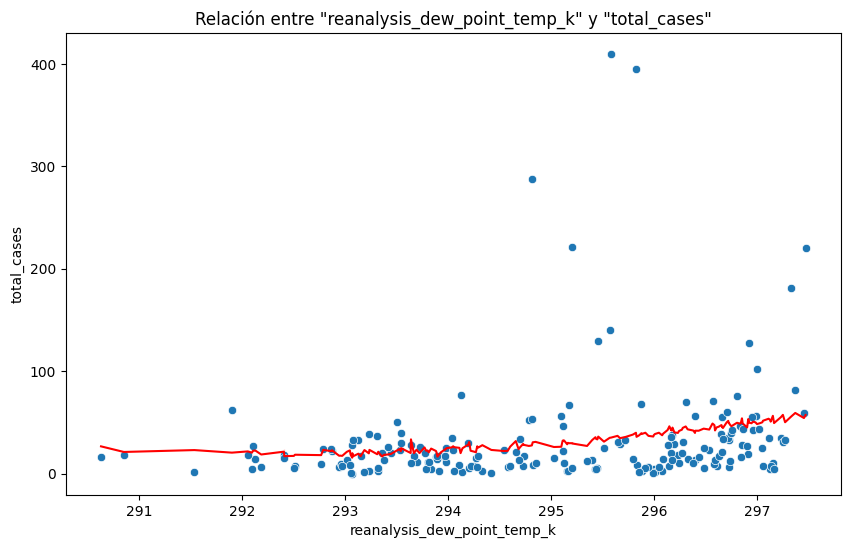

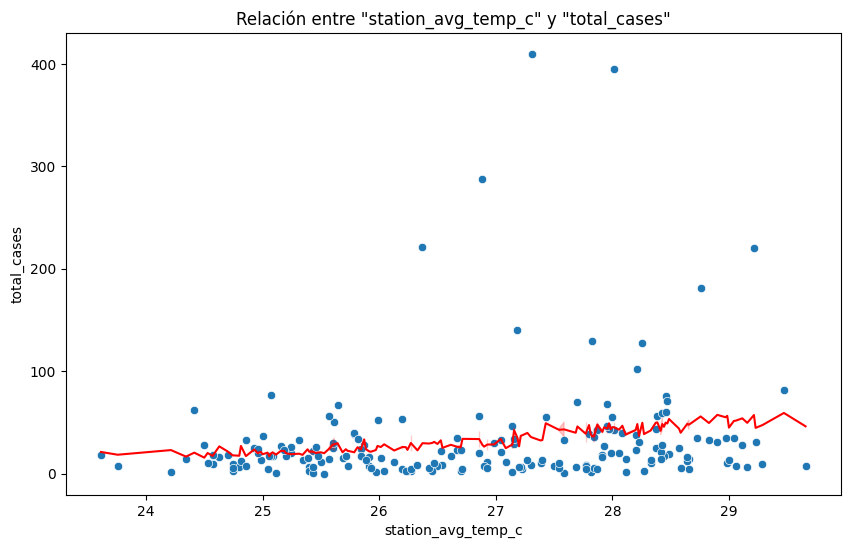

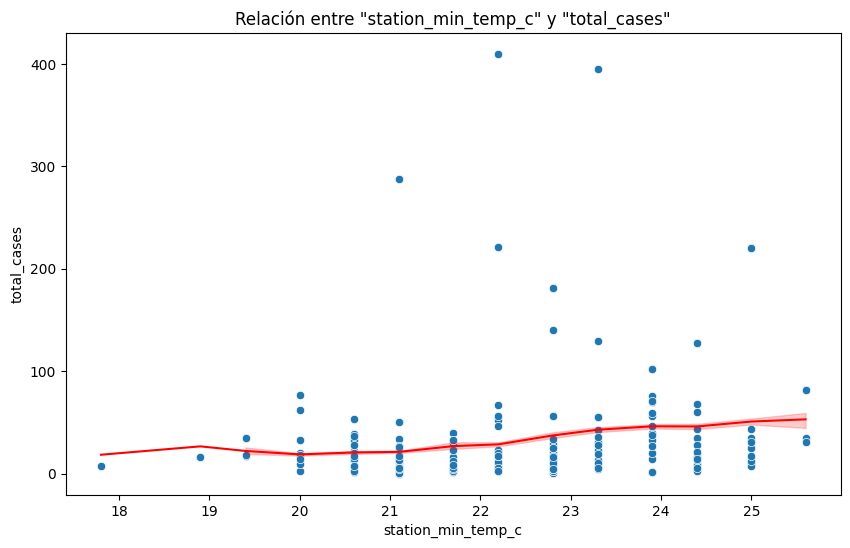

In [ ]:
#graficando SJ
# graficando la regresion lineal
for feature in X_test.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X_test[feature], y=y_test)  # Grafica los datos reales
    sns.lineplot(x=X_test[feature], y=y_pred, color='red')  # Grafica las predicciones
    plt.title(f'Relación entre "{feature}" y "total_cases"')
    plt.show()

In [ ]:
# para iq_train
X = iq_train.drop(columns=['total_cases'])  # características
y = iq_train['total_cases']  # variable objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Error medio cuadrado_IQ: {mse:.2f}")

Error medio cuadrado_IQ: 225.03


In [ ]:
# coeficiente de determinación
r2 = r2_score(y_test, y_pred)
print(f'R2 score IQ: {r2}')

R2 score IQ: 0.027587254156161256


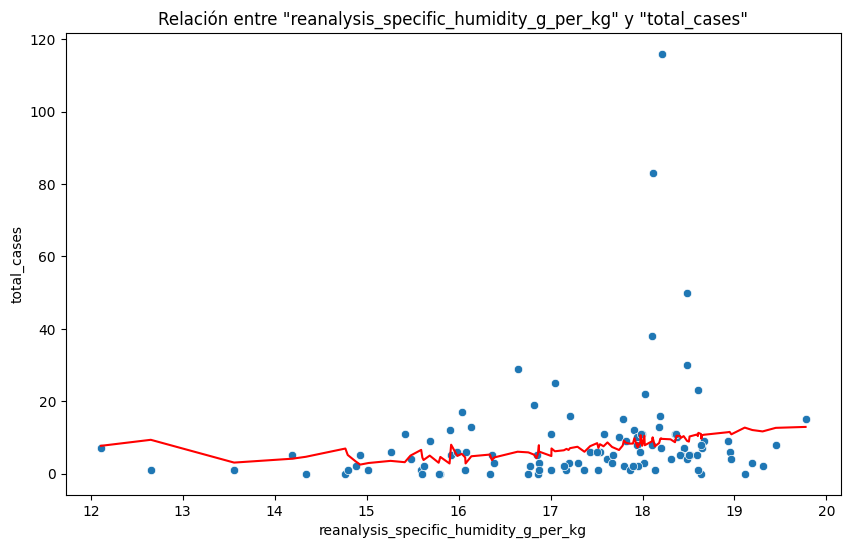

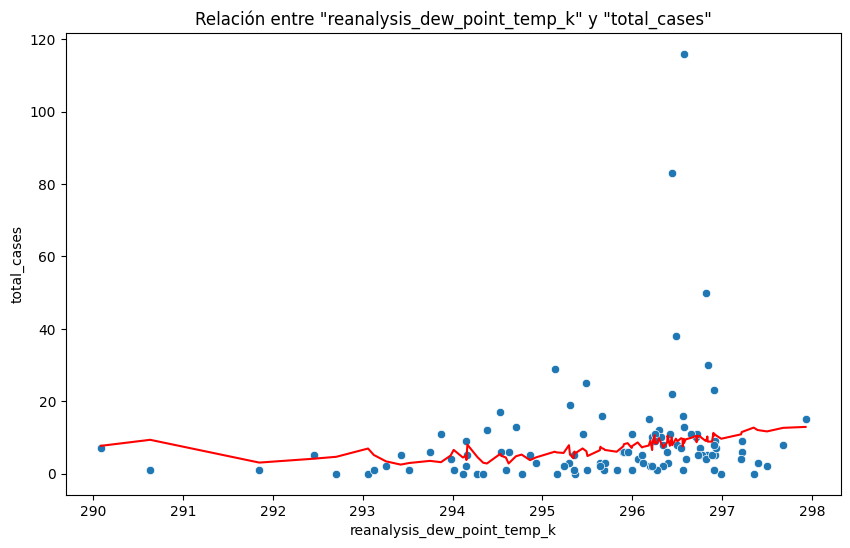

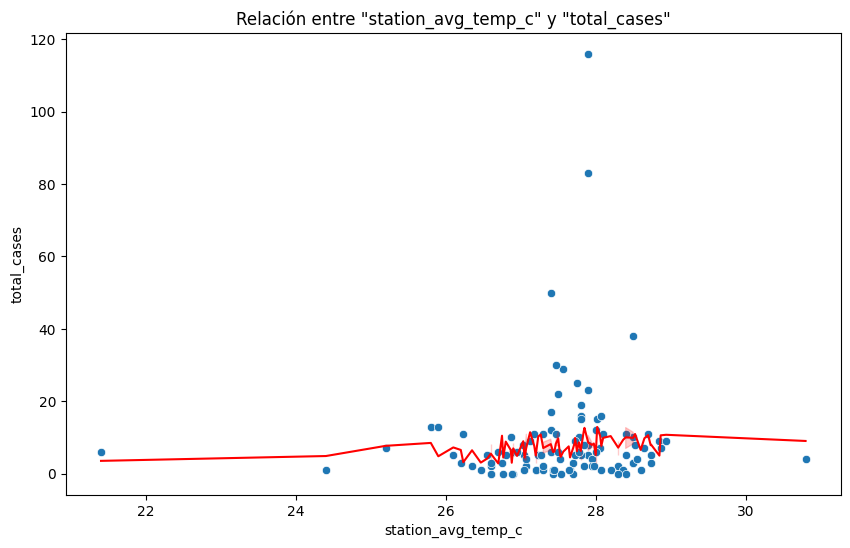

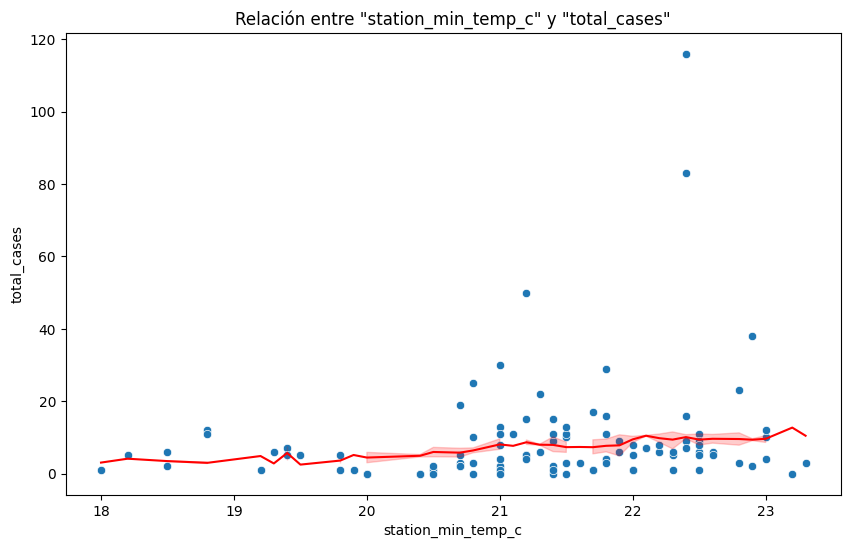

In [ ]:
# graficando IQ
# graficando la regresion lineal
for feature in X_test.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X_test[feature], y=y_test)  # Grafica los datos reales
    sns.lineplot(x=X_test[feature], y=y_pred, color='red')  # Grafica las predicciones
    plt.title(f'Relación entre "{feature}" y "total_cases"')
    plt.show()

* contrucción del modelo de Árbol de Decisión

In [ ]:
# para sj_train
X = sj_train.drop(columns=['total_cases'])  # características
y = sj_train['total_cases']  # variable objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
# error medio cuadrado
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Error medio cuadrado_SJ: {mse:.2f}")

Error medio cuadrado_SJ: 3742.74


In [ ]:
# coeficiente de determinación
r2 = r2_score(y_test, y_pred)
print(f'R2 score SJ: {r2}')

R2 score SJ: -0.28689052844620444


In [ ]:
#ajustar hierparametros
regressor = DecisionTreeRegressor(max_depth=10, min_samples_split=5, random_state=0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_split=5, random_state=0)

In [ ]:
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Error medio cuadrado_SJ: {mse:.2f}")

Error medio cuadrado_SJ: 3236.12


In [ ]:
# coeficiente de determinación
r2 = r2_score(y_test, y_pred)
print(f'R2 score SJ: {r2}')

R2 score SJ: -0.11269849865227455


In [ ]:
#graficando el arbol
#from sklearn.tree import plot_tree
#plt.figure(figsize=(20, 10))
#plot_tree(regressor, filled=True, feature_names=X.columns, rounded=True, fontsize=12)
#plt.show()

In [ ]:
# para sj_train
X = iq_train.drop(columns=['total_cases'])  # características
y = iq_train['total_cases']  # variable objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Error medio cuadrado_IQ: {mse:.2f}")

Error medio cuadrado_IQ: 323.56


In [ ]:
# coeficiente de determinación
r2 = r2_score(y_test, y_pred)
print(f'R2 score IQ: {r2}')

R2 score IQ: -0.39820443374060077


In [ ]:
#ajustar hierparametros
regressor = DecisionTreeRegressor(max_depth=10, min_samples_split=5, random_state=0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_split=5, random_state=0)

In [ ]:
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Error medio cuadrado_IQ: {mse:.2f}")

Error medio cuadrado_IQ: 316.75


In [ ]:
# coeficiente de determinación
r2 = r2_score(y_test, y_pred)
print(f'R2 score IQ: {r2}')

R2 score IQ: -0.36878264816417405


In [ ]:
#graficando el arbol
#from sklearn.tree import plot_tree
#plt.figure(figsize=(20, 10))
#plot_tree(regressor, filled=True, feature_names=X.columns, rounded=True, fontsize=12)
#plt.show()

## Observaciones:
*   *hasta aqui los modelos, y en virtud a las métricas no estarían sindo favorables.*

Es necesario hacer una revision - 26/09/23 - 11.25




## APARTADO ESPECIAL - prueba

In [ ]:
sj_train_subtrain = sj_train.head(800)
sj_train_subtest = sj_train.tail(sj_train.shape[0] - 800)

iq_train_subtrain = iq_train.head(400)
iq_train_subtest = iq_train.tail(iq_train.shape[0] - 400)

In [ ]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [ ]:
from statsmodels.tools import eval_measures
import statsmodels.formula.api as smf

def get_best_model(train, test):
    # Paso 1: especifique la forma del modelo
    model_formula = "total_cases ~ 1 + " \
                    "reanalysis_specific_humidity_g_per_kg + " \
                    "reanalysis_dew_point_temp_k + " \
                    "station_min_temp_c + " \
                    "station_avg_temp_c"

    grid = 10 ** np.arange(-8, -3, dtype=np.float64)

    best_alpha = []
    best_score = 1000

    # Paso 2: encuentre el mejor hiperparámetro, alpha
    for alpha in grid:
        model = smf.glm(formula=model_formula,
                        data=train,
                        family=sm.families.NegativeBinomial(alpha=alpha))

        results = model.fit()
        predictions = results.predict(test).astype(int)
        score = eval_measures.meanabs(predictions, test.total_cases)

        if score < best_score:
            best_alpha = alpha
            best_score = score

    print('mejor alpha = ', best_alpha)
    print('mejor puntuación = ', best_score)

    # Paso 3: reajustar todo el conjunto de datos
    full_dataset = pd.concat([train, test])
    model = smf.glm(formula=model_formula,
                    data=full_dataset,
                    family=sm.families.NegativeBinomial(alpha=best_alpha))

    fitted_model = model.fit()
    return fitted_model

sj_best_model = get_best_model(sj_train_subtrain, sj_train_subtest)
iq_best_model = get_best_model(iq_train_subtrain, iq_train_subtest)

best alpha =  1e-08
best score =  22.080882352941178
best alpha =  1e-08
best score =  6.466666666666667


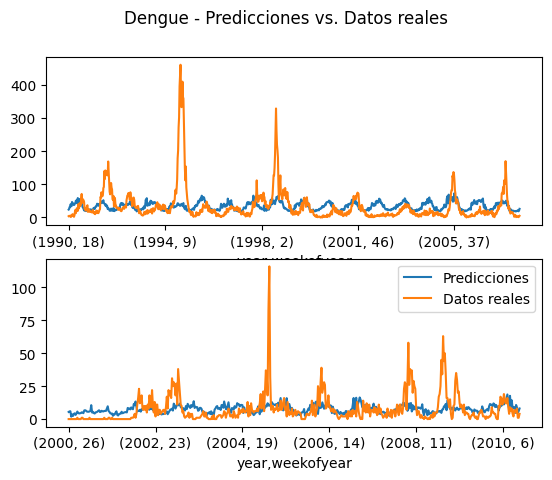

In [ ]:
figs, axes = plt.subplots(nrows=2, ncols=1)

# plot sj
sj_train['fitted'] = sj_best_model.fittedvalues
sj_train.fitted.plot(ax=axes[0], label="Predicciones")
sj_train.total_cases.plot(ax=axes[0], label="Datos reales")

# plot iq
iq_train['fitted'] = iq_best_model.fittedvalues
iq_train.fitted.plot(ax=axes[1], label="Predicciones")
iq_train.total_cases.plot(ax=axes[1], label="Datos reales")

plt.suptitle("Dengue - Predicciones vs. Datos reales")
plt.legend()

Algunas conclusiones:
* El modelo tampoco rinde suficientemente, utilizando 'Statsmodels' (herramienta para el estudio de series temporales) .
* Es probable que los datos no sean suficientes.
* Debido a que el dengue se transmite a través de los mosquitos, y el ciclo de vida de los mosquitos depende del agua, debemos tener en cuenta tanto la vida del mosquito como el tiempo entre la infección y los síntomas al modelar este trabajo.
* Faltaría una variable de "contagiosidad" (?)